<center> <h1>Trabajo Práctico 2</h1> </center>

<center> <h2>Obtención y análisis de listas de compuestos</h2> </center>

---
# Preparación del notebook

En la celda que se encuentra a continuación vamos a importar e instalar todas las librerías que se van a usar.

Primero vamos a instalar todo el software RDKit y otras librerias que vamos a usar con el comando `!pip`. Luego le vamos a pedir que "tenga a mano" sólo las librerías que vamos a usar con el comando `import`.

❗ Para ejecutar los comandos tenemos que "correr la celda". Para hacerlo,  podés apretar el boton "Run" o usar el comando "Ctrl + Enter"

👇

In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm chembl_downloader pubchempy chembl_webresource_client xlsxwriter

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.0 MB/s eta 0:00:00
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13818 sha256=94240c2a667571e8bca107301d6cc83811d5d99f6ca2deadb1f7af5b20bad037
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


A lo largo de este práctico vamos a estar trabajando con los comandos básicos de RDKit y de Pandas para trabajar con una lista de moléculas.
Las listas de moléculas las vamos a obtener de diferentes bases de datos.

# Parte 1: Obtención de datos

## PubChem

Primero vamos a trabajar con los datos disponibles en [PubChem](https://pubchem.ncbi.nlm.nih.gov/), que es una base de datos químicos abierta del National Institutes of Health (NIH).

Para hacerlo vamos a usar la libreria PubChemPy. Esta libreria nos permite interactuar con PubChem usando Python. Permite búsquedas químicas por nombre, subestructura y similitud, representación y recuperación de propiedades químicas, entre otros.

Para usar esta libreria tenemos que llamarla usando `pcp` y luego agregar el nombre del comando que queremos llevar a cabo.

Por ejemplo, a continuación usaremos el comando `get_compounds` para obtener un compuesto usando su nombre:

👇

In [ ]:
# Importar libreria de PubChem
import pubchempy as pcp

# Busca un compuesto por su nombre
molecula = pcp.get_compounds('aspirin', 'name')

In [ ]:
molecula[0]

Compound(2244)

También podemos usar `get_compounds` para obtener un compuesto usando su Compound ID (cid):

👇

In [ ]:
# Busca un compuesto por su Compound ID (cid)
molecula_cid = pcp.get_compounds(5090, 'cid')
print(molecula_cid)

# Busca un compuesto por su smiles
molecula_smiles = pcp.get_compounds('C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1', 'smiles')
print(molecula_smiles)

# Busca un compuesto por su Inchi
molecula_inchi = pcp.get_compounds('InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)', 'inchi')
print(molecula_inchi)

[Compound(5090)]
[Compound(1318)]
[Compound(2244)]


Esto va a generar la variable `molecula`

Veamos que sucede cuando lo imprimimos y que tipo de variable es:

In [ ]:
#Imprimir la variable molecula
print(molecula)

#Imprimir el tipo de variable
type(molecula)

[Compound(2244)]


list

Es una lista con un solo elemento!

Las listas son conjuntos ordenados de elementos (números, cadenas, listas, etc). Las listas se delimitan por corchetes `[ ]` y los elementos se separan por comas.

Para acceder a una lista necesitamos usar `[ ]` e indicarle a que elemento de la lista nos vamos a referir.

💭Los elementos de una lista comienzan desde el cero en adelante

In [ ]:
#Imprimir el primer elemento de la lista
print(molecula[0])

Compound(2244)


Ahora que pudimos acceder a la molécula en la lista podemos obtener información de ella usando esta lista de comandos:
*   molecular_formula
*   molecular_weight
*   iupac_name
*   synonyms
*   isomeric_smiles
*   inchi
*   inchikey

Podés ver la lista completa en este link: https://pubchempy.readthedocs.io/en/latest/guide/properties.html

Para obtener la fórmula molecular usamos `molecular_formula`:

👇

In [ ]:
# Imprimir la fórmula molecular de la primer molécula de la lista
print(molecula[0].molecular_formula)

# Imprimir el peso molecular de la primer molécula de la lista
print(molecula[0].molecular_weight)

# Imprimir el smiles de la primer molécula de la lista
print(molecula[0].isomeric_smiles)

# Imprimir el nombre según IUPAC de la primer molécula de la lista
print(molecula[0].iupac_name)

# Imprimir los sinónimos de la primer molécula de la lista
print(molecula[0].synonyms)

C9H8O4
180.16
CC(=O)OC1=CC=CC=C1C(=O)O
2-acetyloxybenzoic acid
['aspirin', 'ACETYLSALICYLIC ACID', '50-78-2', '2-Acetoxybenzoic acid', '2-(Acetyloxy)benzoic acid', 'Acetosal', 'O-Acetylsalicylic acid', 'o-Acetoxybenzoic acid', 'Acenterine', 'Acetophen', 'Acylpyrin', 'Easprin', 'Ecotrin', 'Salicylic acid acetate', 'Acetosalin', 'Aspirdrops', 'Polopiryna', 'Salcetogen', 'Aceticyl', 'Acetonyl', 'Acetylin', 'Acetylsalicylate', 'Acidum acetylsalicylicum', 'Benaspir', 'Colfarit', 'Empirin', 'Endydol', 'Measurin', 'Rhodine', 'Saletin', 'o-Carboxyphenyl acetate', 'Enterosarein', 'Enterosarine', 'Acetisal', 'Acetylsal', 'Aspirine', 'Bialpirinia', 'Entericin', 'Enterophen', 'Micristin', 'Pharmacin', 'Premaspin', 'Salacetin', 'Solpyron', 'Temperal', 'Acesal', 'Acisal', 'Asagran', 'Asteric', 'Duramax', 'Ecolen', 'Extren', 'Globoid', 'Helicon', 'Idragin', 'Rhonal', 'Aspro', 'Novid', 'Rheumintabletten', 'Yasta', 'Solprin acid', 'Benzoic acid, 2-(acetyloxy)-', '2-acetyloxybenzoic acid', 'Acimetten', 

También podemos obtener una serie de propiedades usando un diccionario.

Un diccionario en Python es una colección de elementos, donde cada uno tiene una clave `key` y un valor `value`. Los diccionarios se pueden crear con llaves `{}` separando con una coma cada par `key: value`. En el siguiente ejemplo tenemos tres `keys` que son el cid, los sinónimos y el smiles.


In [ ]:
# Imprime la información del primer resultado en formato diccionario
print(molecula[0].to_dict(properties=['cid', 'synonyms', 'isomeric_smiles']))

{'cid': 2244, 'synonyms': ['aspirin', 'ACETYLSALICYLIC ACID', '50-78-2', '2-Acetoxybenzoic acid', '2-(Acetyloxy)benzoic acid', 'Acetosal', 'O-Acetylsalicylic acid', 'o-Acetoxybenzoic acid', 'Acenterine', 'Acetophen', 'Acylpyrin', 'Easprin', 'Ecotrin', 'Salicylic acid acetate', 'Acetosalin', 'Aspirdrops', 'Polopiryna', 'Salcetogen', 'Aceticyl', 'Acetonyl', 'Acetylin', 'Acetylsalicylate', 'Acidum acetylsalicylicum', 'Benaspir', 'Colfarit', 'Empirin', 'Endydol', 'Measurin', 'Rhodine', 'Saletin', 'o-Carboxyphenyl acetate', 'Enterosarein', 'Enterosarine', 'Acetisal', 'Acetylsal', 'Aspirine', 'Bialpirinia', 'Entericin', 'Enterophen', 'Micristin', 'Pharmacin', 'Premaspin', 'Salacetin', 'Solpyron', 'Temperal', 'Acesal', 'Acisal', 'Asagran', 'Asteric', 'Duramax', 'Ecolen', 'Extren', 'Globoid', 'Helicon', 'Idragin', 'Rhonal', 'Aspro', 'Novid', 'Rheumintabletten', 'Yasta', 'Solprin acid', 'Benzoic acid, 2-(acetyloxy)-', '2-acetyloxybenzoic acid', 'Acimetten', 'Bialpirina', 'Claradin', 'Clariprin'

Podemos obtener esta información de una lista de datos!

Vamos a usar datos de un ensayo que buscó compuestos que inhiban la actividad de Schnurri3 (SHN3). Esta proteína tiene como función de suprimir la actividad de los osteoblastos, fomentando la formación ósea.
Encontrar compuestos que inhiban esta proteína es una aproximación a buscar nuevos tratamientos contra la osteoporosis.

Para encontrar más información sobre este ensayo pueden ingresar al PubChem y usar el BioAssays Id 624132.

De ese ensayo, seleccionamos una lista de 50 PubChem Compounds ID (CID) que resultaron activos, es decir, que inhibieron a SHN3.

La lista se encuentra en la siguiente celda:

In [ ]:
#Cargar la lista de CIDs
lista_cids = [135870943, 135521560, 135519870, 135517008, 135513616, 135512421, 135512388, 135501733, 135497985, 135481286, 135476833, 135455077, 135438323, 135414027, 135406743, 135401246, 85090241, 56643206, 56643191, 56642958, 54693585, 54692915, 54687736, 54683835, 53312847, 53299516, 53299508, 53299506, 51361447, 51361446, 51361441, 51361440, 51361436, 51360490, 51360349, 51360344, 51360321, 51360310, 51359983, 49795833, 49795742, 49792745, 49792698, 49792581, 49792547, 49792370, 49792323, 49792139, 49791133, 49790979]

In [ ]:
import pandas as pd

#Generar una tabla que tenga como primer columna los CIDs
tabla_cids = pd.DataFrame()
tabla_cids['cid'] = lista_cids

Ahora vamos a usar los comandos que vimos de `pcp` para recolectar información de cada compuesto.

El primer paso es generar la molécula para cada CID:

In [ ]:
import time

# Armar una lista vacia donde vamos a guardar las moléculas
lista_moleculas = []

# Recorrer la columna de CIDs y asignarle la molécula correspondiente.
for i in range(len(tabla_cids)):
    molecula = pcp.get_compounds(str(tabla_cids['cid'][i]), 'cid')
    lista_moleculas.append(molecula)
    time.sleep(1)  # Esperar 1 segundo entre cada request para no saturar al servidor

Este paso puede tomar unos minutos, ya que recolecta los datos de PubChem para cada CID.

Ahora vamos a agregar a la tabla una columna con las moléculas que calculamos en el paso anterior:

In [ ]:
#Agregar a la tabla una columna con las moléculas
tabla_cids['moleculas'] = lista_moleculas

In [ ]:
#Mostrar la tabla completa
tabla_cids

,cid,moleculas
0,135870943,[Compound(135870943)]
1,135521560,[Compound(135521560)]
2,135519870,[Compound(135519870)]
3,135517008,[Compound(135517008)]
4,135513616,[Compound(135513616)]
5,135512421,[Compound(135512421)]
6,135512388,[Compound(135512388)]
7,135501733,[Compound(135501733)]
8,135497985,[Compound(135497985)]
9,135481286,[Compound(135481286)]


In [ ]:
# Recorrer la columna de CIDs y asignarle la fórmula molecular correspondiente.
lista_formulas_moleculares = []
for i in range(len(tabla_cids['moleculas'])):
  # Para cada fila de la columna de moléculas de la tabla cids calculo su formula molecular
  formula_molecular = tabla_cids['moleculas'][i][0].molecular_formula
  #Agrego el parámetro calculado a la lista de fórmulas
  lista_formulas_moleculares.append(formula_molecular)

#Agregar a la tabla una columna con las moléculas
tabla_cids['formula_molecular'] = lista_formulas_moleculares

In [ ]:
#Mostrar la tabla completa
tabla_cids

,cid,moleculas,formula_molecular
0,135870943,[Compound(135870943)],C24H24N4O2S
1,135521560,[Compound(135521560)],C14H21ClN4S
2,135519870,[Compound(135519870)],C15H23ClN4OS
3,135517008,[Compound(135517008)],C23H23N5O2
4,135513616,[Compound(135513616)],C20H21N5O2S
5,135512421,[Compound(135512421)],C20H20ClN5O2S
6,135512388,[Compound(135512388)],C22H18F2N4
7,135501733,[Compound(135501733)],C19H20N4O2
8,135497985,[Compound(135497985)],C21H22N4O2
9,135481286,[Compound(135481286)],C19H16ClNO2


### Actividad N°1 usando PubChem:

💭 Agrega una columan que indique el peso molecular

❗ Escribí el comando en la celda que se encuentra debajo

👇


Si quieren profundizar sobre las aplicaciones de esta librería, pueden ingresar a este link: https://pubchempy.readthedocs.io/en/latest/

---
## ChEMBL

[ChEMBL](https://www.ebi.ac.uk/chembl/) es una base de datos curada manualmente de moléculas bioactivas del Laboratorio Europeo de Biología Molecular (EMBL).


Para trabajar con esta base de datos
vamos a usar la libreria `chembl_webresource_client`. De esa librería la importamos las funciones relacionadas al ingreso a la base de datos como `new_client`.

Esta libreria nos permite acceder a la información disponible en la base de datos.

Podemos ver los recursos disponibles usando el comando que se encuentra a continuación:

In [ ]:
# Importar libreria de ChEMBL
from chembl_webresource_client.new_client import new_client

#Mostrar los recursos disponibles de la libreria chembl_webresource_client.new_client
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'chembl_release', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


El diseño del cliente se basa en Django QuerySet (https://docs.djangoproject.com/en/1.11/ref/models/querysets) y admite los tipos de búsqueda más importantes:

*   exact
*   iexact
*   contains
*   icontains
*   in
*   gt
*   gte
*   lt
*   lte
*   startswith
*   istartswith
*   endswith
*   iendswith
*   range
*   isnull
*   regex
*   iregex

Asi como hicimos con PubChem, podemos buscar moléculas por su nombre.

Para hacerlo, tenemos que llamar a la libreria `.new_client()`. Le vamos a pedir que nos devuelva las moléculas, usando `.molecule()`, que coincidan con el nombre "aspirin" usando el comando `.filter()` y parámetro `pref_name__iexact`.

In [ ]:
#Buscar la información de las moléculas que tienen como nombre "Aspirin"
aspirina = new_client.molecule.filter(pref_name__iexact='aspirin')

In [ ]:
#Imprimir las moléculas que tienen como nombre "Aspirin"
print(len(aspirina))
print(aspirina[0])

1
{'atc_classifications': ['B01AC06', 'N02BA01', 'N02BA51', 'A01AD05', 'N02BA71'], 'availability_type': 2, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 15365, 'chemical_probe': 0, 'chirality': 2, 'cross_references': [{'xref_id': 'aspirin', 'xref_name': 'aspirin', 'xref_src': 'DailyMed'}], 'dosed_ingredient': True, 'first_approval': 1950, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Analgesic; Antirheumatic; Antipyretic', 'inorganic_flag': 0, 'max_phase': '4.0', 'molecule_chembl_id': 'CHEMBL25', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL25', 'molecule_chembl_id': 'CHEMBL25', 'parent_chembl_id': 'CHEMBL25'}, 'molecule_properties': {'alogp': '1.31', 'aromatic_rings': 1, 'cx_logd': '-2.16', 'cx_logp': '1.24', 'cx_most_apka': '3.41', 'cx_most_bpka': None, 'full_molformula': 'C9H8O4', 'full_mwt': '180.16', 'hba': 3, 'hba_lipinski': 4, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 13, 'molecular_species': 'ACID', 'mw_freebase': '180.16', 'mw_monois

Tamién se puede hacer la búsqueda de Aspirin con el ChEMBL ID es CHEMBL25

In [ ]:
#Buscar la información de las moléculas que tienen como ChEMBL ID "CHEMBL25"
aspirina = new_client.molecule.filter(chembl_id='CHEMBL25')

In [ ]:
#Imrprimir la información obtenida para "Aspirin"
aspirina

[{'atc_classifications': ['B01AC06', 'N02BA01', 'N02BA51', 'A01AD05', 'N02BA71'], 'availability_type': 2, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 15365, 'chemical_probe': 0, 'chirality': 2, 'cross_references': [{'xref_id': 'aspirin', 'xref_name': 'aspirin', 'xref_src': 'DailyMed'}], 'dosed_ingredient': True, 'first_approval': 1950, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Analgesic; Antirheumatic; Antipyretic', 'inorganic_flag': 0, 'max_phase': '4.0', 'molecule_chembl_id': 'CHEMBL25', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL25', 'molecule_chembl_id': 'CHEMBL25', 'parent_chembl_id': 'CHEMBL25'}, 'molecule_properties': {'alogp': '1.31', 'aromatic_rings': 1, 'cx_logd': '-2.16', 'cx_logp': '1.24', 'cx_most_apka': '3.41', 'cx_most_bpka': None, 'full_molformula': 'C9H8O4', 'full_mwt': '180.16', 'hba': 3, 'hba_lipinski': 4, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 13, 'molecular_species': 'ACID', 'mw_freebase': '180.16', 'mw_monoiso

Podemos hacer la búsqueda y pedirle que nos devuelva ciertos parámetros usando el comando `.only()`

In [ ]:
#Buscar la información de las moléculas que tienen como ChEMBL ID "CHEMBL25" y devolver solo la información relacionada al ChEMBL ID, el nombre y la estructura
aspirina = new_client.molecule.filter(chembl_id='CHEMBL25').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])

In [ ]:
aspirina

[{'molecule_chembl_id': 'CHEMBL25', 'molecule_structures': {'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O', 'molfile': '\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   19.8052   -4.2758    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   19.8040   -5.0953    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5121   -5.5043    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2217   -5.0948    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2189   -4.2722    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5103   -3.8669    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5078   -3.0497    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2143   -2.6390    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   19.7989   -2.6432    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   21.9250   -3.8609    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   22.6343   -4.2668    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   23.3405   -3.8556    0.0000 C 

También podemos imprimir sólo la información que nos interesa:

Para obtener el nombre se usa `pref_name()`:

👇

In [ ]:
# Imprimir el nombre de la aspirina accediendo a la clave 'pref_name' del primer elemento de la lista 'aspirina'
print('El nombre es '+ aspirina[0]['pref_name'])

El nombre es ASPIRIN


Para obtener el ChEMBL ID se usa `molecule_chembl_id()`:

👇

In [ ]:
# Imprimir el ID de ChEMBL de la aspirina accediendo a la clave 'molecule_chembl_id' del primer elemento de la lista 'aspirina'
print('El ChEMBL ID es '+ aspirina[0]['molecule_chembl_id'])

El ChEMBL ID es CHEMBL25


Para obtener el SMILES se usa `canonical_smiles` que está dentro de la información relacionada a `molecule_structures()`:

👇

In [ ]:
# Imprimir el SMILES de la aspirina accediendo a la clave 'canonical_smiles' dentro de la clave 'molecule_structures' del primer elemento de la lista 'aspirina'
print('El SMILES es '+ aspirina[0]['molecule_structures']['canonical_smiles'])

El SMILES es CC(=O)Oc1ccccc1C(=O)O


Para obtener el InChi se usa `standard_inchi` que está dentro de la información relacionada a `molecule_structures()`:

👇


In [ ]:
# Imprimir el InChI de la aspirina accediendo a la clave 'standard_inchi' dentro de la clave 'molecule_structures' del primer elemento de la lista 'aspirina'
print('El InChi es '+ aspirina[0]['molecule_structures']['standard_inchi'])

El InChi es InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)


Para obtener el InChi se usa `InChiKey` que está dentro de la información relacionada a `standard_inchi_key()`:

👇

In [ ]:
# Imprimir el InChIKey de la aspirina accediendo a la clave 'standard_inchi_key' dentro de la clave 'molecule_structures' del primer elemento de la lista 'aspirina'
print('El InChiKey es '+ aspirina[0]['molecule_structures']['standard_inchi_key'])

El InChiKey es BSYNRYMUTXBXSQ-UHFFFAOYSA-N


Podemos usar `new_client()` para obtener una visualización de la molécula usando el comando `image()`

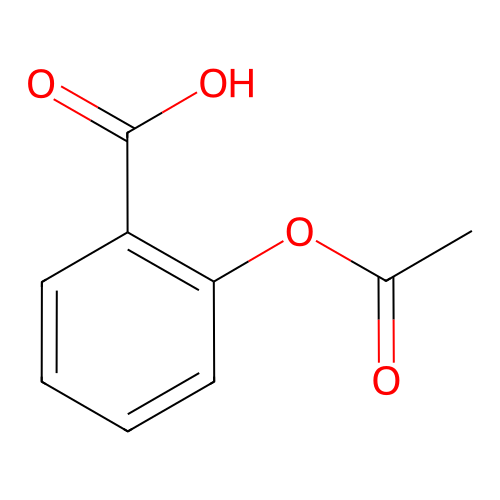

In [ ]:
from IPython.display import SVG

# Crear un objeto de imagen
image = new_client.image

# Establecer el formato de la imagen en SVG
image.set_format('svg')

# Obtener la imagen con el identificador 'CHEMBL25' en formato SVG
svg_image = image.get('CHEMBL25')

# Mostrar la imagen SVG
SVG(svg_image)

Se puede descargar la información dispobible de una molécula usando el InChiKey

In [ ]:
# Filtrar la molécula utilizando el InChIKey y obtener solo los campos 'molecule_chembl_id', 'pref_name' y 'molecule_structures'
molecula = new_client.molecule.filter(molecule_structures__standard_inchi_key='BNRNXUUZRGQAQC-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])

In [ ]:
molecula

[{'molecule_chembl_id': 'CHEMBL192', 'molecule_structures': {'canonical_smiles': 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 'molfile': '\n     RDKit          2D\n\n 33 36  0  0  0  0  0  0  0  0999 V2000\n    2.1000   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1000    0.7000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5375   -0.0042    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917   -0.3667    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042    0.9083    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917    1.0625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792    0.6833    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2042    0.3458    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2875   -0.3750    0.0000 C   0  0  0  0  0  0  0  0  0  

También se puede hacer ingresando la molécula en formato SMILES

In [ ]:
# Filtrar la molécula utilizando el SMILES canónico y obtener solo los campos 'molecule_chembl_id', 'pref_name' y 'molecule_structures'
molecula = new_client.molecule.filter(molecule_structures__canonical_smiles="CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12").only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])

In [ ]:
molecula

[{'molecule_chembl_id': 'CHEMBL192', 'molecule_structures': {'canonical_smiles': 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 'molfile': '\n     RDKit          2D\n\n 33 36  0  0  0  0  0  0  0  0999 V2000\n    2.1000   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1000    0.7000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5375   -0.0042    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917   -0.3667    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042    0.9083    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917    1.0625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792    0.6833    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2042    0.3458    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2875   -0.3750    0.0000 C   0  0  0  0  0  0  0  0  0  

También podemos indicarle que campos queremos obtener

Podemos obtener la información de varias moléculas a la vez:

In [ ]:
# Filtrar las moléculas utilizando el cliente adecuado y los identificadores de ChEMBL especificados y obtener solo los campos 'molecule_chembl_id' (identificador de ChEMBL) y 'pref_name' (nombre preferido)
moleculas = new_client.molecule.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL192', 'CHEMBL27']).only(['molecule_chembl_id', 'pref_name'])

In [ ]:
# Imprimir las moléculas seleccionadas
moleculas

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}, {'molecule_chembl_id': 'CHEMBL27', 'pref_name': 'PROPRANOLOL'}, {'molecule_chembl_id': 'CHEMBL192', 'pref_name': 'SILDENAFIL'}]

Usando `new_client()` también podemos obtener una lista de compuestos similares usando el comando `similarity()`

In [ ]:
# Filtrar las moléculas similares a la aspirina utilizando el cliente adecuado, el identificador de ChEMBL de la aspirina y un umbral de similitud del 70%. Luego obtener solo los campos 'molecule_chembl_id' (identificador de ChEMBL), 'pref_name' (nombre preferido) y 'similarity' (similitud)
similar_aspirina = new_client.similarity.filter(chembl_id='CHEMBL25', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])

In [ ]:
# Imprimir las moléculas seleccionadas
similar_aspirina

[{'molecule_chembl_id': 'CHEMBL2296002', 'pref_name': None, 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL1697753', 'pref_name': 'ASPIRIN DL-LYSINE', 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL3833404', 'pref_name': 'CARBASPIRIN', 'similarity': '88.8888895511627197265625'}, {'molecule_chembl_id': 'CHEMBL3833325', 'pref_name': 'CARBASPIRIN CALCIUM', 'similarity': '88.8888895511627197265625'}, '...(remaining elements truncated)...']

### Actividad N°1 usando ChEMBL:

💭 Escribí los comandos necesarios para indicar las caractéristicas o "molecule_properties" de la molécula `CC(C)NCC(COC1=CC=CC2=CC=CC=C21)O`

❗ Escribí el comando en la celda que se encuentra debajo

👇

### Actividad N°2 usando ChEMBL:

💭 Usando el InchiKey `BNRNXUUZRGQAQC-UHFFFAOYSA-N`, obtengan el smiles usando los comandos que vimos y extraigan de ChEMBL las moléculas que tengan una similitud mayor al 75%

❗ Escribí el comando en la celda que se encuentra debajo

👇

---
# Parte 2: Analisis de conjuntos de datos

En esta sección vamos a trabajar con datos en formato .csv

Los datos los pueden descargar accediendo a este [link](https://drive.google.com/file/d/19Z44waZs4xnoY-mHcdjl1FxiScaoJ6-0/view?usp=sharing)

Tienen que descargar la tabla y luego guardarla en la misma carpeta de Google Drive en la que guardan las copias de las Notebooks del curso.

Luego, vamos a cargar el contenido de drive para poder guardar los archivos generados en este práctico. Este proceso tarda unos minutos y para completarlo debes seguir los siguientes pasos:


1.  Ejecutar la celda que se encuentra debajo
2.  Vas a obtener un cartel que dice "¿Permitir que este cuaderno acceda a tus archivos de Google Drive?"
3.  Apretar "Conectar con Google Drive".
4.  Te va a pedir "Google Drive for desktop quiere acceder a tu cuenta de Google" y tenés que apretar en "permitir".

Esperar unos minutos para que se cargue el contenido de Drive

Listo!🎉

In [ ]:
# Cargar el contenido de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Formato .csv


En este práctico vamos a usar como ejemplo una lista de moléculas proveniente de un ensayo realizado en <i>T. cruzi</i>.

El objetivo de este experimento fue encontrar moléculas que tuvieran actividad tripanocida y asi obtener nuevos candidatos para tratar la enfermedad del Chagas. Se ensayaron ~300.000 compuestos químicos y ~4.000 resultaron activos

Si quieren profundizar, la descripción y el protocolo del ensayo se encuentran en este [link](https://pubchem.ncbi.nlm.nih.gov/bioassay/1885):


---

A continuación vamos a cargar la lista de moléculas activas de ese ensayo. La tabla que les pasamos la tienen que guardar en su drive. El comando que encontrarás a continuación es de la dirección estándar para trabajar en este curso, pero podés modificarla en función de como tengas organizado tu drive.

Si necesitas ayuda para encontrar la carpeta en la que guardaste la tabla podés usar la sección de "Archivo" que se encuentra a la izquierda de la Notebook

In [ ]:
# Importar libreria para cambiar el directorio y guardar archivos
import os

# Indicar la carpeta de trabajo
path = '/content/drive/MyDrive/Curso_quimioinformatica'
os.chdir(path)

Los datos se encuentran guardados en un archivo tipo .csv. Los documentos de este tipo son archivos de texto que corresponden a tablas o listas, donde los datos están separados por comas.

Vamos a abrir el archivo usando un comando de `pandas` llamado `read_csv()`



In [ ]:
#Generar una variable con el nombre de la tabla que contiene la lista de moléculas activas del ensayo
smiles_tabla = pd.read_csv('smiles.csv')

La libreria `pandas` es muy útil para trabajar con datos en Python, si quieren leer más al respecto pueden ingresar al siguiente link: https://pandas.pydata.org/

Al usar este comando estamos generando una variable llamada `smiles_tabla`. Esta variable es en formato `DataFrame`, que es el formato que usa Python para representar tablas.


Vamos a verificar el tipo de la variable usando la función

`type()`

👇

In [ ]:
# Indicar el tipo de variable
type(smiles_tabla)

pandas.core.frame.DataFrame


Ahora veamos que datos tiene el DataFrame imprimiendo la variable "smiles_lista":

👇

In [ ]:
# Imprimir la variable
smiles_tabla

,ID,smiles
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...
...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...


La variable "smiles_tabla" da como resultado una tabla con tres columnas:


1.   La primer columna (la que se encuentra en **negrita**) indica el índice de la fila.
2.   La segunda columna se llama **"ID"** y es un número de identifica a cada molécula.
3.   La tercera columna se llama **"smiles"** y contiene a las moléculas activas del ensayo.



### Actividad N°1 de lista de datos

💭 ¿El archivo importado tiene la cantidad de datos esperada?


La escritura en formato SMILES no permite identificar compuestos duplicados, ya que un mismo compuesto puede escribirse de diferentes

Dentro de la tabla se encuentran guardadas en las "rows" o filas todas las estructuras de smiles activas del ensayo.

Para acceder a las rows, primero tenemos que indicarle el nombre de la columna (en este caso se llama **"smiles"**) y después indicarle el número de fila. Cada una de esas cosas se indican entre corchetes.

Vamos a ver que compuesto se encuentra en la row 1
👇

In [ ]:
# Imprimir el dato que se encuentra en la fila 1 de la columna smiles
smiles_tabla['smiles'][1]

'C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC=CC4=C3N=CC=C4'

### Actividad N°2 de lista de datos

💭 ¿La molécula que obtuvieron es la que esperaban? ¿Por qué se obtuvo este resultado?

❗ Escribí el comando correcto para ver el compuesto que se encuentra en la row 1 en la celda que se encuentra debajo

👇

'CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3)CC4=CC=CS4'

¡Nos indicó el compuesto que está en la row 2!

Esto sucede porque los números de fila comienzan desde el 0


Al igual que en el práctico 1, todos los compuestos se encuentran en en formato "str" o string. Recuerden que este es el formato que usa python para representar texto.

Para verificarlo podemos pedirle a Python que nos diga de que el tipo de la variable usando la función

`type()`


👇

In [ ]:
# Imprimir el tipo de variable que es el dato que se encuentra en la fila 0 de la columna smiles
type(smiles_tabla['smiles'][0])

Lo que buscamos es poder trabajar con la molécula como tal, no como cadena de texto.

Como en el práctico 1, vamos a usar <b>RDKit</b> para hacerlo!

Vamos a transformar en molécula al smiles correspondiente a la fila 1:

👇

In [ ]:
from rdkit import Chem

# Generar una molécula a partir del smiles
molecula = Chem.MolFromSmiles(smiles_tabla['smiles'][0])

In [ ]:
# Imprimir la molécula
molecula

O podemos usar el siguiente comando para transformar a molécula todas las filas de la tabla

👇

In [ ]:
# Generar las moléculas en formato RDKit de todas las filas de una columna
moleculas = [Chem.MolFromSmiles(smiles) for smiles in smiles_tabla['smiles']]

#No le hagan caso al WARNING!

### Actividad N°3 de lista de datos

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

### Actividad N°4 de lista de datos

💭 ¿Qué tipo de variable es?

❗ Escribí el comando en la celda que se encuentra debajo

👇

💡 ¡Es una lista!

Este tipo de variable almacena datos de manera concatenada y separada por comas.

Para poder trabajar mejor, vamos a agregar estas moléculas a la tabla inicial usando el siguiente comando:

👇

In [ ]:
smiles_tabla['moleculas'] = moleculas

Veamos como quedó la tabla terminada:

👇

In [ ]:
smiles_tabla

,ID,smiles,moleculas
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bdf0>
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bd80>
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bed0>
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bf40>
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x7a01e185be60>
...,...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7a01e1759000>
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x7a01e1759070>
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x7a01e17590e0>
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x7a01e1759150>


Podemos usar un comando el siguiente comando para dibujar todas las moléculas de la tabla

👇

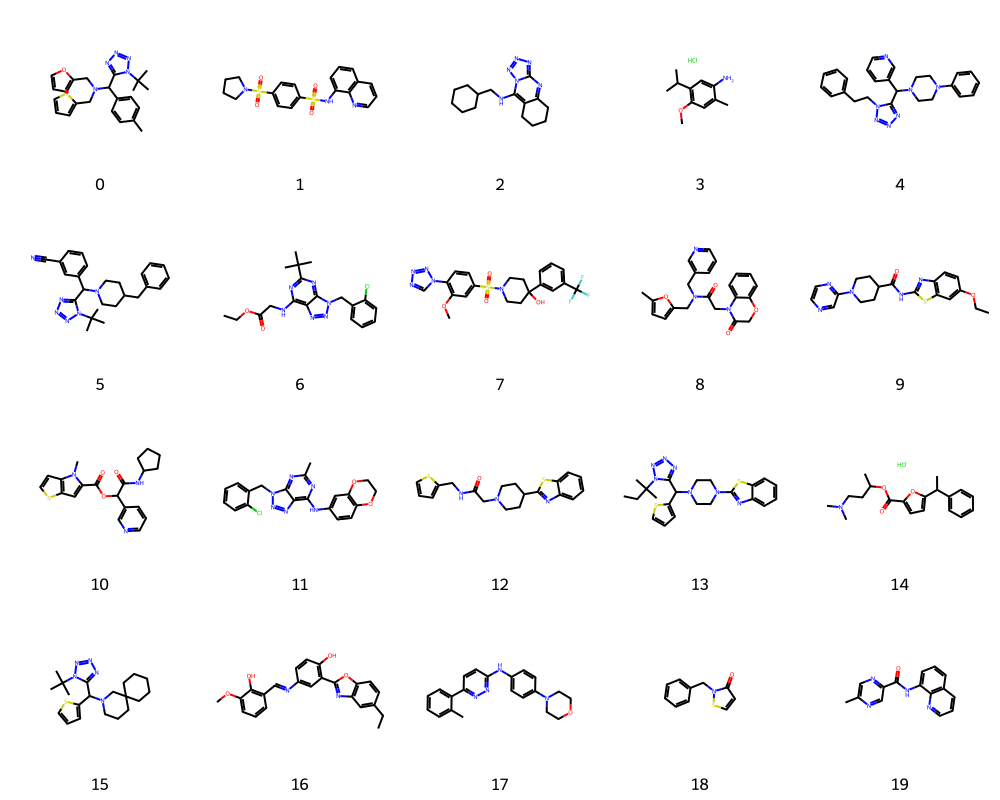

In [ ]:
from rdkit.Chem import Draw

# Generar imagen de las primeras N moléculas (por ejemplo, 20)
Draw.MolsToGridImage(
    smiles_tabla['moleculas'].iloc[:20].tolist(),
    legends=smiles_tabla['ID'].astype(str).iloc[:20].tolist(),
    molsPerRow=5,
    subImgSize=(200, 200)
)

## PandasTools

PandasTools es una libreria que
habilita varias funciones que permiten usar moléculas RDKit como columnas de un marco de datos de Pandas.

Esto nos va a permitir hacer la conversión de moléculas que hicimos en la sección anterior de una manera más rápida.

Vamos a volver a cargar la tabla:

In [ ]:
#Generar una variable con el nombre de la tabla que contiene la lista de moléculas activas del ensayo
smiles_tabla = pd.read_csv('smiles.csv')

Ahora vamos a usar `PandasTools` para agregar la molécula de cada smiles

In [ ]:
from rdkit.Chem import PandasTools

#Agregar el formato molécula de RDKit para cada smiles
PandasTools.AddMoleculeColumnToFrame(smiles_tabla, smilesCol='smiles')

Vamos a imprimir la tabla para ver como quedó:

,ID,smiles,ROMol
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,
...,...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,

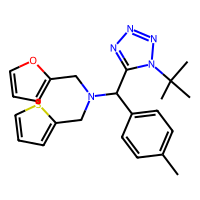
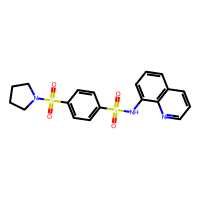
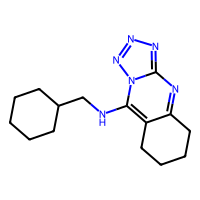
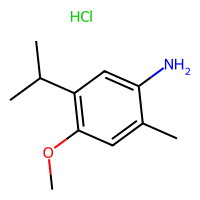
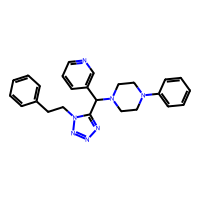
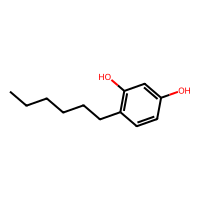
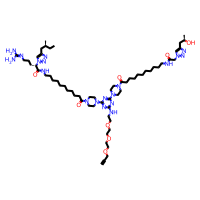
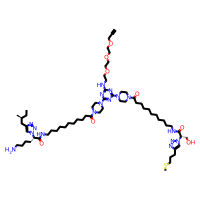
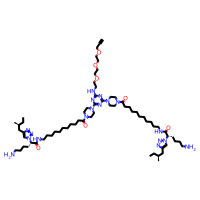
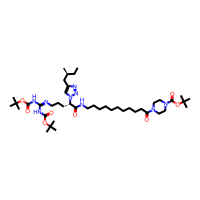

In [ ]:
#Imprimir la tabla
smiles_tabla

---
## Limpieza de datos


Para todo trabajo bioinformático es fundamental el tratamiento de los datos para descartar valores nulos y repetidos.
En el caso de la quimioinformática, esto trae sus desafíos

La nomenclatura usada para los compuestos va a tener un rol importante en el tratamiento de los datos.
Como vimos en el práctico 1, la nomenclatura en smiles puede variar para un mismo compuesto. Es por este motivo que se recomienda filtrar los duplicados usando la nomenclatura Inchi o InchiKey.

Vamos a cambiar la forma de llamar a nuestras moléculas:

In [ ]:
# Generar el InchiKey de todas las moléculas de la tabla
moleculas_inchikey = [Chem.MolToInchiKey(molecula) for molecula in smiles_tabla['ROMol']]
smiles_tabla['inchikey'] = moleculas_inchikey

Ahora vamos a eliminar las moléculas que estén duplicadas sólo en la columna de `InchiKey`

In [ ]:
# Eliminar los duplicados de la columna "inchikey" y quedarse con la primera vez que aparece
smiles_tabla = smiles_tabla.drop_duplicates(smiles_tabla.columns[~smiles_tabla.columns.isin(['inchikey'])], keep='first')

Por último, vamos a eliminar las filas que tengan valores vacíos usando la función `dropna()`

In [ ]:
#Eliminar filas con datos vacios o NA
smiles_tabla.dropna()

,ID,smiles,ROMol,moleculas,inchikey
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x7a01e076d5b0>,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bdf0>,GWPBJZLTYMUVMV-UHFFFAOYSA-N
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x7a01dd09a260>,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bd80>,AQJOPZLWPJXKQC-UHFFFAOYSA-N
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x7a01dd09a880>,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bed0>,GSSZIRDJOKLGGZ-UHFFFAOYSA-N
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x7a01dd09a8f0>,<rdkit.Chem.rdchem.Mol object at 0x7a01e185bf40>,FQMDGRJHBVBUTR-UHFFFAOYSA-N
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x7a01dd09a960>,<rdkit.Chem.rdchem.Mol object at 0x7a01e185be60>,OXXMYGBQTYQECH-UHFFFAOYSA-N
...,...,...,...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7a01dd163990>,<rdkit.Chem.rdchem.Mol object at 0x7a01e1759000>,WFJIVOKAWHGMBH-UHFFFAOYSA-N
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x7a01dd163a00>,<rdkit.Chem.rdchem.Mol object at 0x7a01e1759070>,RNLYVRKMBPOHNI-UNDPIUDWSA-N
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x7a01dd163a70>,<rdkit.Chem.rdchem.Mol object at 0x7a01e17590e0>,SMYFYPCDLGZRIA-IEAZLBRSSA-N
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x7a01dd163ae0>,<rdkit.Chem.rdchem.Mol object at 0x7a01e1759150>,UIZOYKBALIHNJF-MODPYIGGSA-N


Veamos como quedó la tabla después del procesamiento:

,ID,smiles,ROMol,moleculas,inchikey
0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,,,GWPBJZLTYMUVMV-UHFFFAOYSA-N
1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,,,AQJOPZLWPJXKQC-UHFFFAOYSA-N
2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,,,GSSZIRDJOKLGGZ-UHFFFAOYSA-N
3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,,,FQMDGRJHBVBUTR-UHFFFAOYSA-N
4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,,,OXXMYGBQTYQECH-UHFFFAOYSA-N
...,...,...,...,...,...
4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,,,WFJIVOKAWHGMBH-UHFFFAOYSA-N
4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,,,RNLYVRKMBPOHNI-UNDPIUDWSA-N
4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,,,SMYFYPCDLGZRIA-IEAZLBRSSA-N
4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,,,UIZOYKBALIHNJF-MODPYIGGSA-N

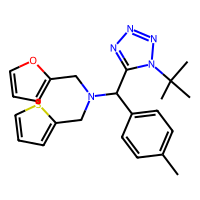
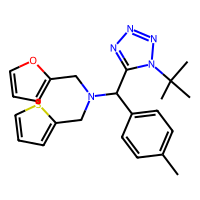
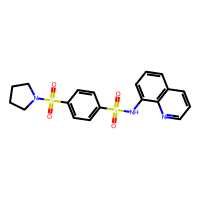
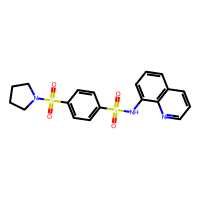
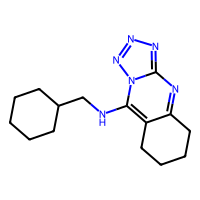
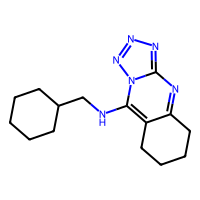
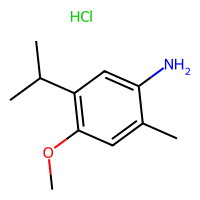
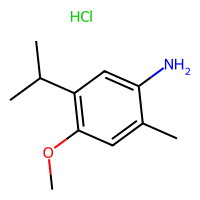
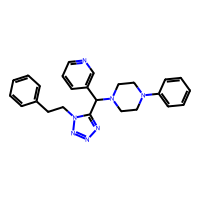
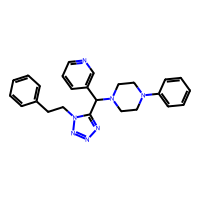
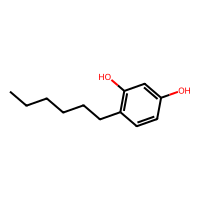
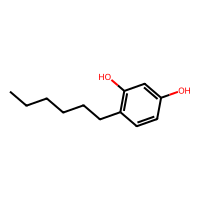
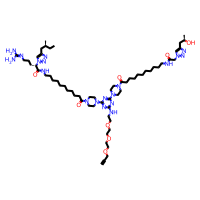
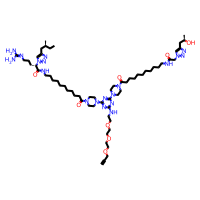
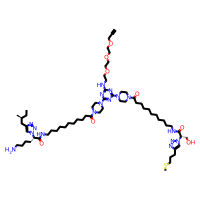
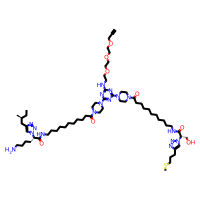
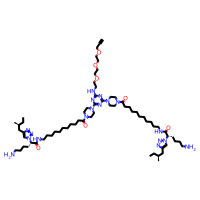
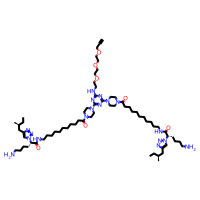
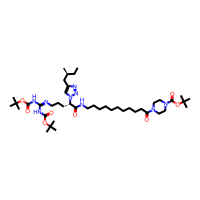
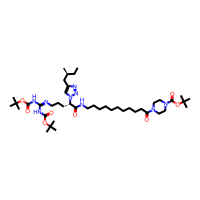

In [ ]:
# Imprimir la tabla
PandasTools.AddMoleculeColumnToFrame(smiles_tabla, smilesCol='smiles')
smiles_tabla

Por último, podemos guardar la tabla con los datos:

In [ ]:
#Guardar la tabla
PandasTools.SaveXlsxFromFrame(smiles_tabla, 'smiles_tabla.xlsx', molCol='ROMol')

Accedan a la carpeta de Drive que indicaron en el path y vean smiles_tabla.xlsx

---
## Identificar subestructuras en listas de datos

En el práctico 1 aprendimos a identificar un funcional específico en una molécula, hoy vamos a hacerlo con la tabla de moléculas.

El objetivo de esta sección será seleccionar todas las moléculas que tengan un grupo benceno

### Actividad N°5 de lista de datos

1.  Generá la molécula de RDKit del grupo funcional Benceno
2.  Seleccioná las moléculas de la tabla que tengan el grupo funcional y generá una tabla nueva llamada substructuras_tabla
Pista: Podés usar un comando asi
`substructuras = [x for x in smiles_tabla['ROMol'] if x.HasSubstructMatch`





❗ Usa la celda inferior para resolver el ejercicio

👇

💭 ¿Que obtuvieron como resultado?

💭 ¿Cuántas moléculas de la tabla inicial tienen un grupo benceno?

Vamos a usar el comando "merge" para agregarle los nombres que usamos para identificar a cada molécula.

Este comando une dos data frames usando una columna en común:

![merge](https://miro.medium.com/v2/resize:fit:1200/1*9eH1_7VbTZPZd9jBiGIyNA.png)

Para más información sobre como se usa este comando pueden ingresar a este [link](https://https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html):


👇

In [ ]:
tabla_merge = smiles_tabla.merge(substructuras_tabla, left_on='ROMol', right_on='moleculas')

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

Podemos usar un comando el siguiente comando para dibujar todas las moléculas de la nueva tabla

👇

In [ ]:
Chem.Draw.MolsToGridImage(tabla_merge['moleculas'], legends = [(str(substructuras_tabla['ID'][i])) for i in range(len(substructuras_tabla))],maxMols = 200)

💭 ¿Lo que observas en la celda anterior corresponde con lo que esperabas ver?

💭 ¿Todos los compuestos tienen al menos un grupo benceno?

---
# Ejercicios Integradores

<center> <h3>¡Ahora te toca hacer el análisis a vos!</h3> </center>


## Actividad N°1:

1.  Ingresá al BioEnsayo ID 625003 de PubChem
2.  Explicar en que consiste el ensayo
3.  Descargá en formato csv los compuestos activos
4.  Cargá la tabla de datos a drive
5.  Abrí la tabla usando Pandas
6.  Graficá todas las moléculas usando PandasTools


❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

## Actividad N°2:

1.  Ingresá al BioEnsayo ID CHEMBL674637 de ChEMBL
2.  Explicar en que consiste el ensayo
3.  Descargá la información del ensayo usando

```
new_client.activity.filter(assay_chembl_id=assay_chembl_id)
```


4.  Guardá los datos del ensayo en una variable
5.  Obtené una lista de los compuestos ensayados
5.  Armá una tabla con los compuestos ensayados usando Pandas
6.  Convertí todas las moléculas usando RDKit
7.  Identificá al menos tres subestructuras conservadas entre los datos
8.  Guardá las moléculas con cada subestructura en una tabla diferente
9.  Descargá los datos en tres archivos .csv


❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

## Actividad N°3:

1. Buscá todas las moléculas que sean usadas para "Cancer de ovario" cargadas en ChEMBL

💡Pista: Podés usar un comando de este estilo:
```
drug_indication.filter(efo_term__icontains="OVARIAN CARCINOMA")
```


2. Recolecta la escructura de las moléculas en formato InChi

3. Realizá una tabla con el ChEMBl ID, el InChi y la fórmula química y el peso molecular de cada molécula

❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

## Actividad N°4:

1. Buscá todas las moléculas aprobadas por la FDA cargadas en ChEMBL

💡Pista: Podés usar un comando de este estilo:
```
new_client.molecule.filter(max_phase=4)
```

2. Recolecta la escructura de las moléculas en formato SMILES

3. Graficá todas las moléculas indicando debajo el ChEMBL ID

❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

## Actividad N°5:

La libreria new_client tiene una función llamada new_client.activity que permite identificar compuestos según su bioactividad.

1.  Usando `new_client.activity` realizá una búsqueda de compuestos que hayan sido ensayados en las siguientes condiciones:

```
*   target_chembl_id=CHEMBL203  #El target es el Epidermal growth factor receptor (EGFR)
*   type="IC50" #Ensayos de IC50
*   relation="="  #Iguales a
*   assay_type="B"  #Ensayos de binding
```

2.  Generá una tabla con los datos obtenidos

💡Pista: Podés usar un comando de este estilo:
```
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
```

3.  Generá una nueva tabla con los ChEMBL ID
4.  A esa tabla agrega el SMILES de cada compuesto
5.  Computá la molécula de cada compuesto usando RDKit
6.  Esquematizá los compuestos usando PandasTools
7.  Guardá la tabla


❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

# Bibliografía:

Esta guía está elaborada en base a https://www.rdkit.org/docs/GettingStartedInPython.html

*  "The ChEMBL database: a comprehensive drug discovery resource" de Anna Gaulton et al.

*  Davies M, Nowotka M, Papadatos G, Dedman N, Gaulton A, Atkinson F, Bellis L, Overington JP. (2015) 'ChEMBL web services: streamlining access to drug discovery data and utilities.' Nucleic Acids Res., 43(W1) W612-W620.
DOI: 10.1093/nar/gkv352 PMC: PMC4489243

*  Kim, S., Chen, J., Cheng, T., Gindulyte, A., He, J., He, S., Li, Q., Shoemaker, B. A., Thiessen, P. A., Yu, B., Zaslavsky, L., Zhang, J., & Bolton, E. E. (2023). PubChem 2023 update. Nucleic Acids Res., 51(D1), D1373–D1380. https://doi.org/10.1093/nar/gkac956

*   RDKit: Open-source cheminformatics. https://www.rdkit.org